In [1]:
import pandas as pd #imports panda library with alias pd                           
import numpy as np #imports NumPy library with alias np
import matplotlib.pyplot as plt #imports matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder #imports TransactionEncoder to encode rows 
from mlxtend.frequent_patterns import apriori, association_rules #Imports apriori and association rules to find frequent itemsets and get support, confidence and lift metrics
df = pd.read_csv('/Users/smzerbe/Documents/groceries2.csv', dtype={'locationid': np.int64}) #loads the groceries2 dataset as a pandas dataframe called df
df.head(9835) 

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape #shows column and row count of dataset

(9835, 33)

In [3]:
df.info() #Shows null values in each column and the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [4]:
trans = [] #creates list to store transactions
for index, row in df.iloc[:, 1:].iterrows(): #loop through all rows skips Item(s) column
    transaction = [str(item) for item in row if pd.notna(item)] #creates list of items names from rows, storing them as strings and skipping missing values
    trans.append(transaction) #Adds new transaction list of items to trans 

In [5]:
TE = TransactionEncoder() #Creates TransactionEncoder as TE
array = TE.fit(trans).transform(trans) #fits and encodes the transactions in an array as True or False

In [6]:
df_cleaned = pd.DataFrame(array, columns=TE.columns_) #converts dataset to true/false array 
df_cleaned #displays new cleaned true/false dataset

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
for col in df_cleaned.columns: 
    print(col) #Provides all 169 column names

Instant food products
UHT-milk
abrasive cleaner
artif. sweetener
baby cosmetics
baby food
bags
baking powder
bathroom cleaner
beef
berries
beverages
bottled beer
bottled water
brandy
brown bread
butter
butter milk
cake bar
candles
candy
canned beer
canned fish
canned fruit
canned vegetables
cat food
cereals
chewing gum
chicken
chocolate
chocolate marshmallow
citrus fruit
cleaner
cling film/bags
cocoa drinks
coffee
condensed milk
cooking chocolate
cookware
cream
cream cheese
curd
curd cheese
decalcifier
dental care
dessert
detergent
dish cleaner
dishes
dog food
domestic eggs
female sanitary products
finished products
fish
flour
flower (seeds)
flower soil/fertilizer
frankfurter
frozen chicken
frozen dessert
frozen fish
frozen fruits
frozen meals
frozen potato products
frozen vegetables
fruit/vegetable juice
grapes
hair spray
ham
hamburger meat
hard cheese
herbs
honey
house keeping products
hygiene articles
ice cream
instant coffee
jam
ketchup
kitchen towels
kitchen utensil
light bulbs
li

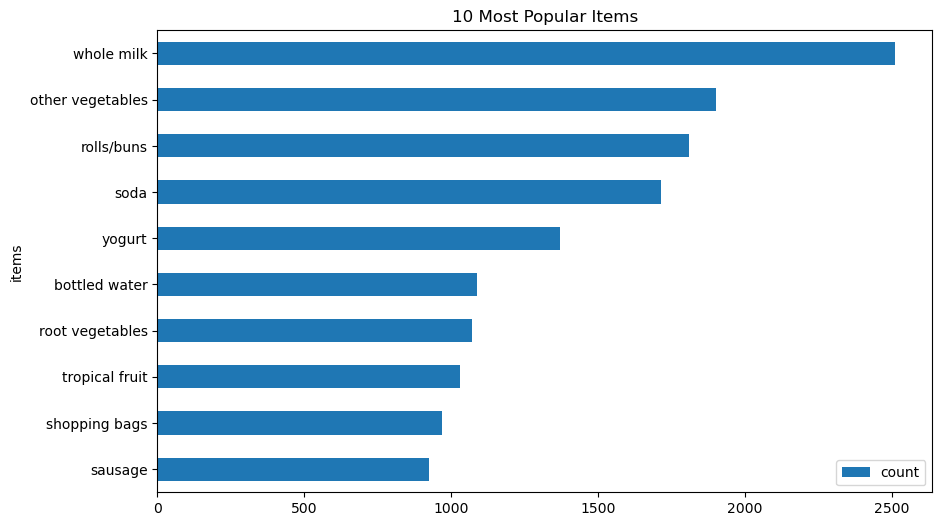

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #Ignores Depreciation Warning

count = df_cleaned.loc[:, :].sum() #sums the total count of each item transaction
pop_item = count.sort_values(ascending=False).head(10) #sorts the total count of each item descending and displays the top 10
pop_item = pop_item.reset_index() #resets the index to allow for items to be a column  
pop_item = pop_item.rename(columns={'index': 'items', 0: 'count'}) #renames columns so index becomes items and 0 becomes count
plt.rcParams['figure.figsize'] = (10, 6) #sets parameters of visualizaion
ax = pop_item.plot.barh(x='items', y='count') #creates bar chart with x axis as items and y axis as count
plt.title('10 Most Popular Items') #titles bar chart 
plt.gca().invert_yaxis() #inverts y axis so items with highest total count are at the top
plt.show() #shows bar chart 

In [9]:
a_rules = apriori(df_cleaned, min_support=0.05, use_colnames=True) #runs apriori on dataset keeping combinations in >= 5% of transactions and using actual column names and stores as a_rules 
a_rules #shows first 5 rows of a_rules 

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [10]:
ass_r = association_rules(a_rules, metric='lift', min_threshold = 1) #makes association rules exluding rules with lift scores below 1 
ass_r #shows all rows that meet the lift score threshold of 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432


In [11]:
ass_r = ass_r[(ass_r['lift'] >= 1.50) & (ass_r['confidence'] >= 0.25)] #filters rows in ass_r with lift scores of 1.4 or above and confidence scores of 0.3 or above
ass_r = ass_r.sort_values(by=['lift', 'confidence'], ascending=False) #sort rules by lift in descending order (best first) with confidence score used as a tie breaker
ass_r #displays updated ass_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817


In [12]:
df_cleaned['yogurt'].sum()  #provides total count of times yogurt was purchased

1372

In [13]:
df_cleaned['whole milk'].sum() #provides total count of times whole milk was purchased

2513

In [14]:
df_cleaned['other vegetables'].sum()  #provides total count of times other vegetables was purchased

1903

In [15]:
df_cleaned.to_csv('market_basket_cleaned', index=False) #saves cleaned dataset